# Algorithme de Glouton

Fonction versionNo(M : Matrice[Bool]) : Matrice[Bool]
    M1 ← Matrice de même taille que M initialisée à zéro
    
    Pour chaque ligne i de 0 à M.lignes - 1 faire
        Pour chaque colonne j de 0 à M.colonnes - 1 faire
            Si M[i, j] = Vrai Alors
                M1[i, j] ← 1
                M1[j, i] ← 1
            FinSi
        FinPour
    FinPour
    
    Retourner M1
FinFonction

Fonction greedyColoring(adj_matrix : Matrice[Bool], V : Entier) : Liste[Entier]
    result ← Liste d'entiers de taille V initialisée à [-1]
    colors ← Liste de booléens de taille V + 1 initialisée à [Faux, Faux, ..., Faux]

    // Fonction pour marquer les couleurs des voisins comme indisponibles
    Procedure MarkAdjacentColorsUnavailable(u : Entier)
        Pour chaque voisin v de 0 à V-1 faire
            Si adj_matrix[u, v] = Vrai et result[v] ≠ -1 Alors
                colors[result[v]] ← Vrai
            FinSi
        FinPour
    FinProcedure

    // Fonction pour trouver la première couleur disponible
    Fonction FindFirstAvailableColor() : Entier
        cr ← 1
        TantQue (cr ≤ V) et (colors[cr] = Vrai) faire
            cr ← cr + 1
        FinTantQue
        Retourner cr
    FinFonction

    // Assigner les couleurs aux sommets
    Pour chaque sommet u de 0 à V-1 faire
        MarkAdjacentColorsUnavailable(u)
        result[u] ← FindFirstAvailableColor()
        
        // Réinitialiser les couleurs pour la prochaine itération
        Pour chaque voisin v de 0 à V-1 faire
            Si adj_matrix[u, v] = Vrai et result[v] ≠ -1 Alors
                colors[result[v]] ← Faux
            FinSi
        FinPour
    FinPour

    // Afficher le résultat
    Pour chaque sommet u de 0 à V-1 faire
        Afficher "Sommet ", u + 1, " ---> Couleur ", result[u]
    FinPour

    // Coordonnées des sommets
    x ← Liste des coordonnées x des sommets
    y ← Liste des coordonnées y des sommets

    // Création du graphe non orienté
    Afficher le graphe avec les sommets et les arêtes

    Retourner result
FinFonction

Complexité: O($V^{3}$) où V est le nombre de sommets dans le graphe

Coloriage du graphe 1
Sommet 1 ---> Couleur 1
Sommet 2 ---> Couleur 2
Sommet 3 ---> Couleur 3
Sommet 4 ---> Couleur 2
Nombre chromatique du graphe 1: 3


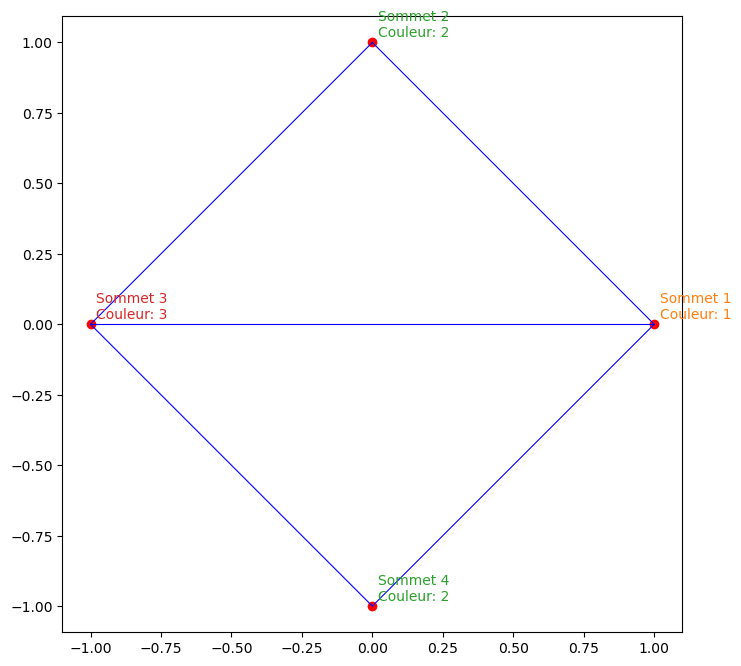


Coloriage du graphe 2
Sommet 1 ---> Couleur 1
Sommet 2 ---> Couleur 2
Sommet 3 ---> Couleur 3
Sommet 4 ---> Couleur 1
Sommet 5 ---> Couleur 2
Nombre chromatique du graphe 2: 3


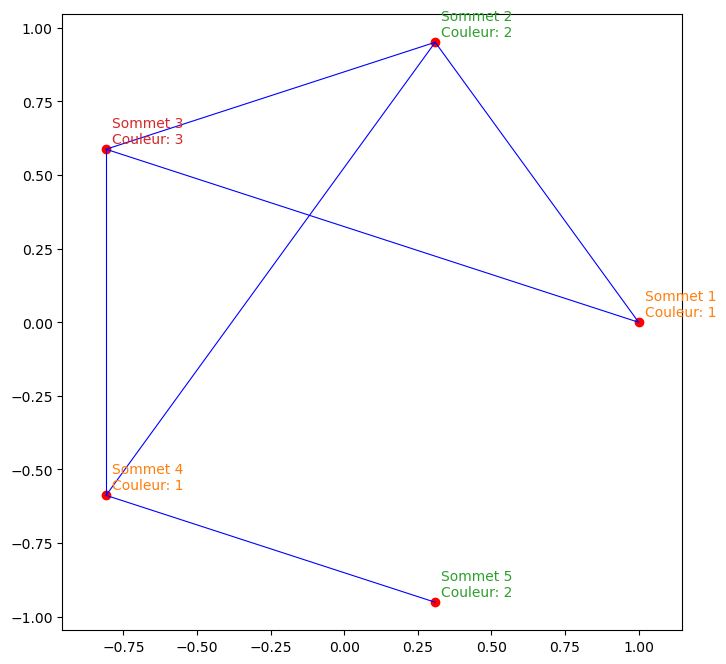


Coloriage du graphe 3
Sommet 1 ---> Couleur 1
Sommet 2 ---> Couleur 2
Sommet 3 ---> Couleur 3
Sommet 4 ---> Couleur 1
Sommet 5 ---> Couleur 4
Sommet 6 ---> Couleur 2
Nombre chromatique du graphe 3: 4


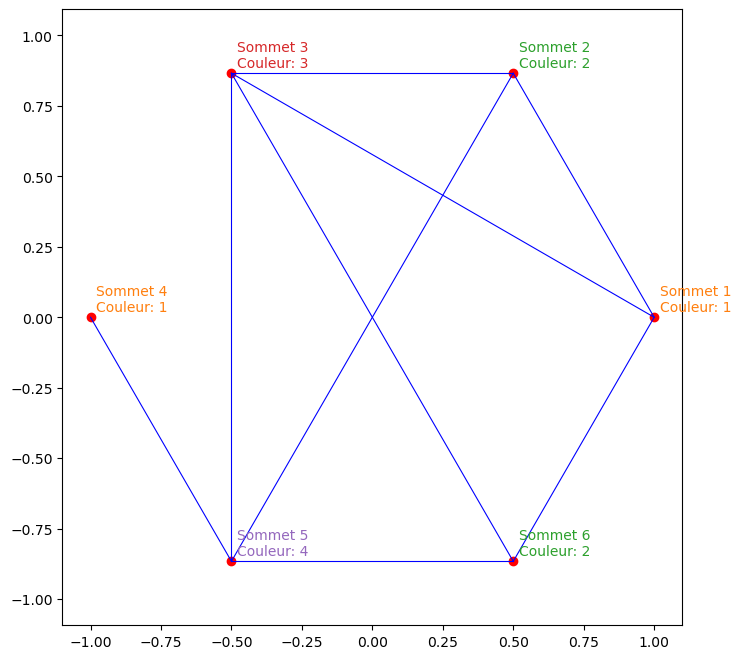


Coloriage du graphe 4
Sommet 1 ---> Couleur 1
Sommet 2 ---> Couleur 2
Sommet 3 ---> Couleur 1
Sommet 4 ---> Couleur 3
Sommet 5 ---> Couleur 1
Sommet 6 ---> Couleur 2
Sommet 7 ---> Couleur 3
Nombre chromatique du graphe 4: 3


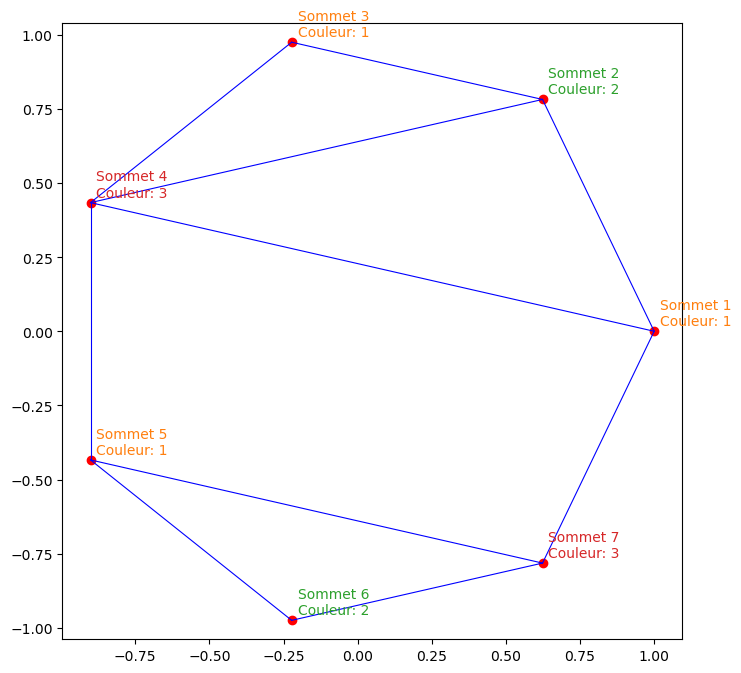

In [80]:
import numpy as np
import matplotlib.pyplot as plt

# Cette fonction prend une matrice M représentant un graphe orienté en paramètre et renvoie la matrice M1 représentant la version non orientée du graphe
def versionNo(M):
    M1 = np.zeros((M.shape[0], M.shape[1])) # Initialise une nouvelle matrice M1 de dimensions identiques à celles de la matrice M, remplie de zéros
    for i in range(M.shape[0]): # Boucle sur toutes les lignes de la matrice M
        for j in range(M.shape[1]): # À l'intérieur de la première boucle, boucle sur toutes les colonnes de la matrice M
            if M[i, j] == 1: # Vérifie si la valeur à la position (i, j) dans la matrice M est égale à 1
                M1[i, j] = 1 # Modifie la valeur correspondante dans la matrice M1 à 1
                M1[j, i] = 1 # Modifie également la valeur symétrique dans la matrice M1 (j, i) à 1
    return M1 # Renvoyer la matrice M1 qui stocke le résultat des modifications

# Cette fonction implémente l'algorithme de coloration gloutonne pour colorier un graphe non orienté
def glouton(adj_matrix, V):
    # Initialise la liste result avec -1. Cette liste stocke les couleurs attribuées à chaque sommet. Un sommet non coloré est représenté par -1
    result = [-1] * V
    
    # Initialise la liste colors avec False. Elle marque les couleurs déjà utilisées par les voisins d'un sommet. Les indices représentent les couleurs
    colors = [False] * (V + 1)  # Le tableau des couleurs commence à partir de l'index 1
    
    # Attribue des couleurs aux sommets
    for u in range(V): # Boucle à travers chaque sommet du graphe
        # Marque toutes les couleurs adjacentes comme indisponibles
        for i in range(V): # Boucle à travers les sommets voisins du sommet u
            if adj_matrix[u, i] == 1 and result[i] != -1: # Vérifie si u est connecté à i et si i est déjà coloré
                colors[result[i]] = True #  Marque la couleur de i comme indisponible

        # Trouve la première couleur disponible
        cr = 1 # Initialise cr à 1. cr représente la couleur actuelle en cours d'évaluation
        while cr <= V: # Boucle pour trouver la première couleur disponible
            if not colors[cr]: # Vérifie si la couleur cr n'est pas utilisée
                break # Sort de la boucle 'while' si la couleur est disponible
            cr += 1 # Passe à la couleur suivante

        result[u] = cr # Attribue la couleur cr au sommet u

        # Réinitialise les couleurs pour la prochaine itération
        for i in range(V): # Réinitialise les couleurs pour la prochaine itération en marquant comme non utilisées les couleurs des voisins déjà colorés
            if adj_matrix[u, i] == 1 and result[i] != -1: # Vérifie si u est connecté à i et si i est déjà coloré
                colors[result[i]] = False # Marque la couleur de i comme disponible pour la prochaine itération

    # Affiche les résultats
    for u in range(V): # Boucle pour afficher les résultats
        print("Sommet", u + 1, "---> Couleur", result[u]) # Affiche le numéro du sommet et la couleur qui lui a été attribuée
    
    return result # Retourne le résultat de la fonction, qui est une liste contenant la couleur attribuée à chaque sommet

# Cette fonction calcule le nombre chromatique d'un graphe
def chromaticNumber(colorArray):
    return len(set(colorArray)) # Convertit la liste de couleurs en un ensemble pour supprimer les doublons + renvoie la longueur de cet ensemble

# Cette fonction est responsable de visualiser un graphe coloré
def plotGraph(adj_matrix, colors): # Elle prend une matrice d'adjacence (adj_matrix) et une liste de couleurs (colors) en entrée
    V = adj_matrix.shape[0] # Calcule le nombre de sommets (V) dans le graphe en accédant au nombre de lignes dans la matrice d'adjacence
    x = np.cos(2 * np.pi * np.arange(V) / V) # Calcule les coordonnées x pour placer les sommets dans une disposition circulaire 
    y = np.sin(2 * np.pi * np.arange(V) / V) # Calcule les coordonnées y pour placer les sommets dans une disposition circulaire 

    plt.figure(figsize=(8, 8)) # Crée une nouvelle figure pour le tracé avec une taille spécifiée de 8x8 pouces
    plt.axis('equal') # Assure que les axes x et y ont la même échelle, résultant en un tracé carré
    plt.plot(x, y, color='r', linestyle='', marker='o') # Trace les sommets en tant que points rouges sans lignes de connexion

    for i, (xi, yi) in enumerate(zip(x, y)): # Itère à travers les sommets et leurs coordonnées
        # ajoute des annotations textuelles à côté de chaque sommet, indiquant le numéro du sommet (i + 1) et sa couleur attribuée
        plt.text(xi + 0.02, yi + 0.02, f"Sommet {i + 1}\nCouleur: {colors[i]}", fontsize=10, color=f'C{colors[i]}') 

    N = versionNo(adj_matrix) # Crée une version non orientée (N) du graphe d'entrée en utilisant la fonction versionNo
    for i in range(V): # itère à travers toutes les paires de sommets pour tracer les arêtes du graphe
        for j in range(i + 1, V): # itère à travers toutes les paires de sommets pour tracer les arêtes du graphe
            if N[i][j] == 1: # vérifie s'il y a une arête entre les sommets i et j dans le graphe non orienté
                plt.plot([x[i], x[j]], [y[i], y[j]], color='b', linestyle='-', linewidth=0.8) # trace une ligne bleue connectant les sommets i et j 
    plt.show() # affiche le tracé final
    
# Exemple de Graphe 1
g1 = np.array([
    [0, 1, 1, 1],
    [1, 0, 1, 0],
    [1, 1, 0, 1],
    [1, 0, 1, 0],
])
print("Coloriage du graphe 1")
colors_g1 = glouton(versionNo(g1), 4)
chromatic_number_g1 = chromaticNumber(colors_g1)
print("Nombre chromatique du graphe 1:", chromatic_number_g1)
plotGraph(versionNo(g1), colors_g1)

# Exemple de Graphe 2
g2 = np.array([[0, 1, 1, 0, 0],
               [1, 0, 1, 1, 0],
               [1, 1, 0, 1, 0],
               [0, 1, 1, 0, 1],
               [0, 0, 0, 1, 0]])
print("\nColoriage du graphe 2")
colors_g2 = glouton(versionNo(g2), 5)
chromatic_number_g2 = chromaticNumber(colors_g2)
print("Nombre chromatique du graphe 2:", chromatic_number_g2)
plotGraph(versionNo(g2), colors_g2)

# Exemple de Graphe 3
g3 = np.array([[0, 1, 1, 0, 0, 1],
               [1, 0, 1, 0, 1, 0],
               [1, 1, 0, 0, 1, 0],
               [0, 0, 0, 0, 1, 0],
               [0, 1, 1, 1, 0, 1],
               [1, 0, 1, 0, 1, 1]])
print("\nColoriage du graphe 3")
colors_g3 = glouton(versionNo(g3), 6)
chromatic_number_g3 = chromaticNumber(colors_g3)
print("Nombre chromatique du graphe 3:", chromatic_number_g3)
plotGraph(versionNo(g3), colors_g3)

# Exemple de Graphe 4
g4 = np.array([
    [0, 1, 0, 1, 0, 0, 1],
    [1, 0, 1, 1, 0, 0, 0],
    [0, 1, 0, 1, 0, 0, 0],
    [1, 1, 1, 0, 1, 0, 0],
    [0, 0, 0, 1, 0, 1, 1],
    [0, 0, 0, 0, 1, 0, 1],
    [1, 0, 0, 0, 1, 1, 0]
])
print("\nColoriage du graphe 4")
colors_g4 = glouton(versionNo(g4), 7)
chromatic_number_g4 = chromaticNumber(colors_g4)
print("Nombre chromatique du graphe 4:", chromatic_number_g4)
plotGraph(versionNo(g4), colors_g4)

# Backtracking

Function printConfiguration(colorArray)
    For i = 1 to V
        Print("Sommet : ", i, " Couleur : ", colorArray[i])

Function isSafe(v, colorArray, vertex)
    For i = 1 to V
        If graph[v][i] == 1 and colorArray[i] == vertex
            Return False
    Return True

Function graphColoringAlgorithmUtil(m, colorArray, currentVertex)
    If currentVertex == V
        Return True

    For i = 1 to m
        If isSafe(currentVertex, colorArray, i) == True
            colorArray[currentVertex] = i
            If graphColoringAlgorithmUtil(m, colorArray, currentVertex + 1) == True
                Return True
            End If
            colorArray[currentVertex] = 0  # backtrack

    Return False

Function graphColoringAlgorithm(colorArray, m)
    colorArray = [0] * V
    If graphColoringAlgorithmUtil(m, colorArray, 0) == False
        Print("La coloration n'est pas possible !")
        Return False

    Print("La coloration est possible !")
    printConfiguration(colorArray)

    # Affichage du graphe
    ...

Complextité: O($m^{V}$), où m est le nombre de couleurs et V est le nombre de sommets

Le nombre de nodes augmente de façon exponentielle à tous les niveaux de l'arbre spatial d'état. Avec les couleurs m et V sommets, le nombre total de nœuds dans l'arbre spatial d'état serait: 1 + m + m² + $m^{3}$ + …. + $m^{V}$

Coloriage du graphe 1
La coloration est possible !
Le nombre chromatique du graphe est : 3
Les couleurs attribuées sont les suivantes :
Sommet 1 - Couleur : 1
Sommet 2 - Couleur : 2
Sommet 3 - Couleur : 3
Sommet 4 - Couleur : 2


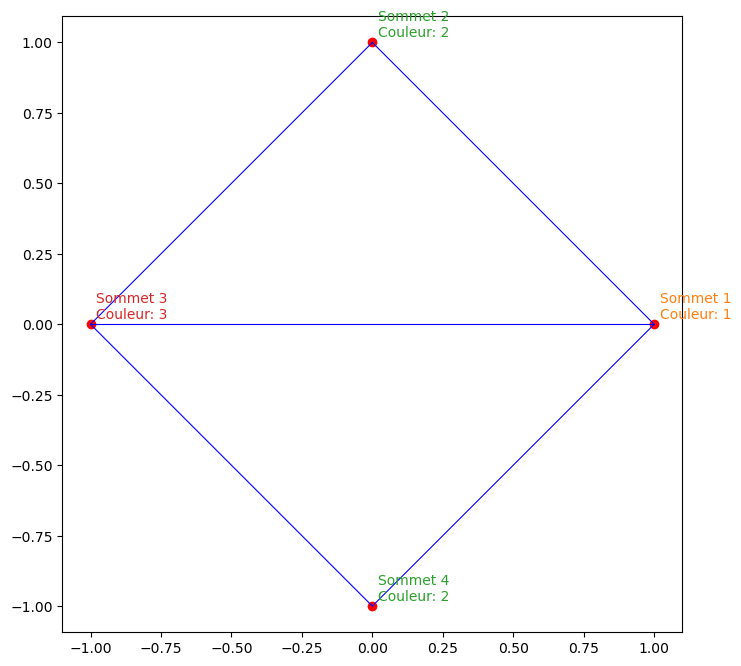

Coloriage du graphe 2
La coloration est possible !
Le nombre chromatique du graphe est : 3
Les couleurs attribuées sont les suivantes :
Sommet 1 - Couleur : 1
Sommet 2 - Couleur : 2
Sommet 3 - Couleur : 3
Sommet 4 - Couleur : 1
Sommet 5 - Couleur : 2


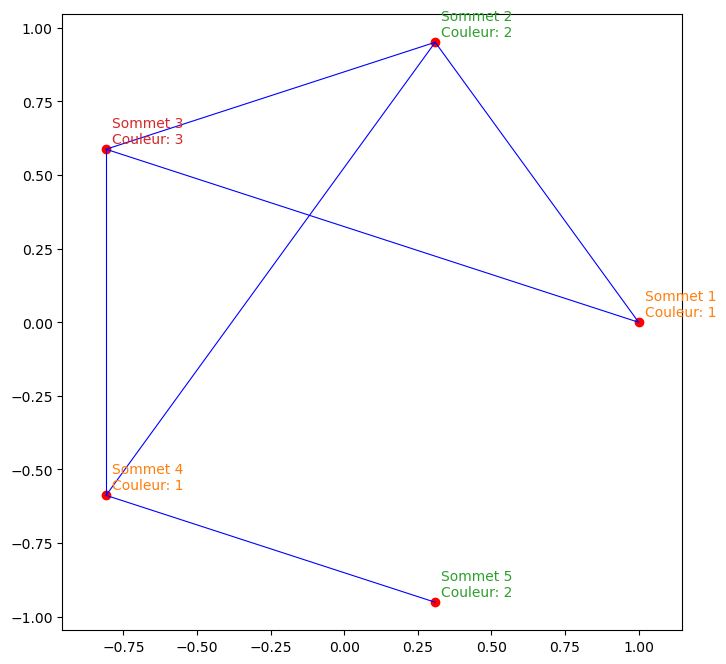

Coloriage du graphe 3
La coloration est possible !
Le nombre chromatique du graphe est : 3
Les couleurs attribuées sont les suivantes :
Sommet 1 - Couleur : 1
Sommet 2 - Couleur : 2
Sommet 3 - Couleur : 3
Sommet 4 - Couleur : 2
Sommet 5 - Couleur : 1
Sommet 6 - Couleur : 2


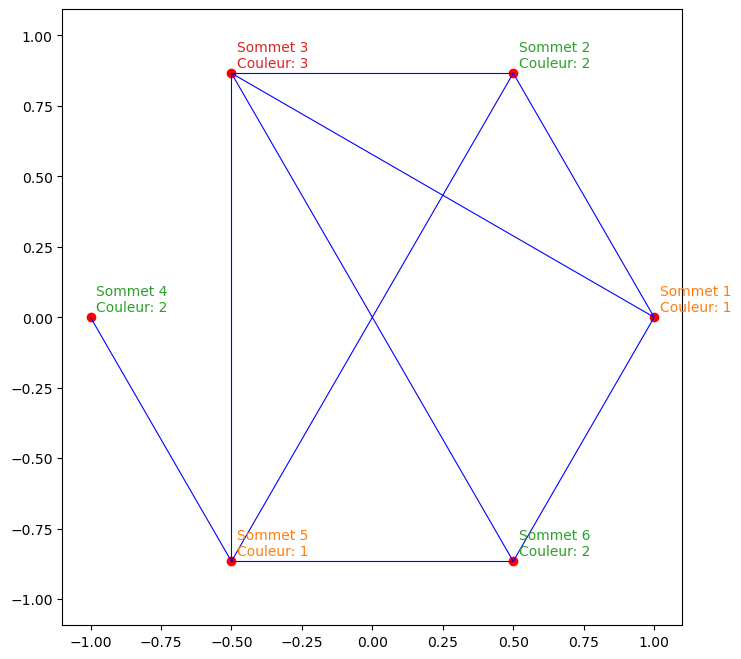

Coloriage du graphe 4
La coloration est possible !
Le nombre chromatique du graphe est : 3
Les couleurs attribuées sont les suivantes :
Sommet 1 - Couleur : 1
Sommet 2 - Couleur : 2
Sommet 3 - Couleur : 1
Sommet 4 - Couleur : 3
Sommet 5 - Couleur : 1
Sommet 6 - Couleur : 2
Sommet 7 - Couleur : 3


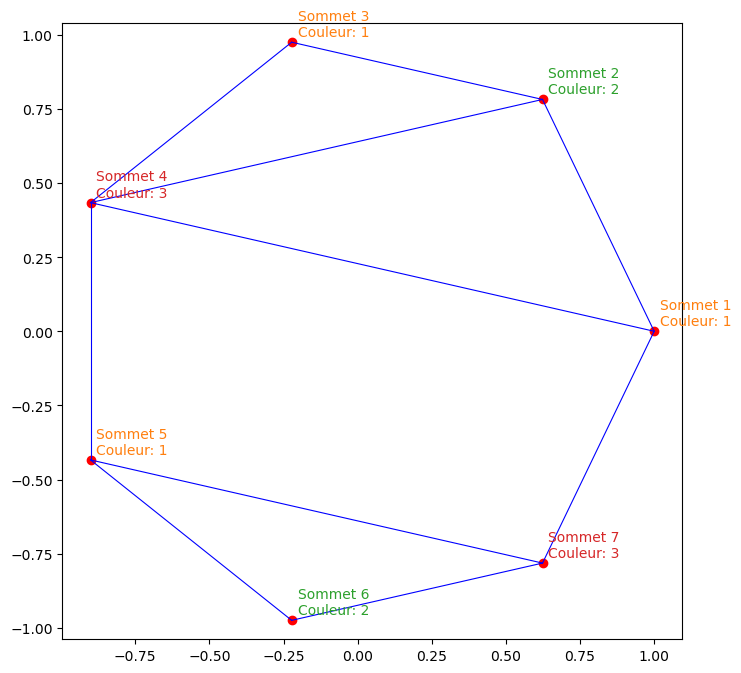

In [81]:
import numpy as np
import matplotlib.pyplot as plt

def printConfiguration(colorArray):
    print("Les couleurs attribuées sont les suivantes :")
    for i, color in enumerate(colorArray):
        print(f"Sommet {i + 1} - Couleur : {color}")

def isSafe(v, colorArray, vertex, graph):
    for i in range(len(colorArray)):
        if graph[v][i] == 1 and colorArray[i] == vertex:
            return False
    return True

def graphColoringAlgorithmUtil(m, colorArray, currentVertex, graph):
    if currentVertex == len(colorArray):
        return True

    for i in range(1, m + 1):
        if isSafe(currentVertex, colorArray, i, graph):
            colorArray[currentVertex] = i
            if graphColoringAlgorithmUtil(m, colorArray, currentVertex + 1, graph):
                return True
            colorArray[currentVertex] = 0

    return False

def chromaticNumber(colorArray):
    return len(set(colorArray))

# Cette fonction prend une matrice M représentant un graphe orienté en paramètre et renvoie la matrice M1 représentant la version non orientée du graphe
def versionNo(M):
    M1 = np.zeros((M.shape[0], M.shape[1])) # Initialise une nouvelle matrice M1 de dimensions identiques à celles de la matrice M, remplie de zéros
    for i in range(M.shape[0]): # Boucle sur toutes les lignes de la matrice M
        for j in range(M.shape[1]): # À l'intérieur de la première boucle, boucle sur toutes les colonnes de la matrice M
            if M[i, j] == 1: # Vérifie si la valeur à la position (i, j) dans la matrice M est égale à 1
                M1[i, j] = 1 # Modifie la valeur correspondante dans la matrice M1 à 1
                M1[j, i] = 1 # Modifie également la valeur symétrique dans la matrice M1 (j, i) à 1
    return M1 # Renvoyer la matrice M1 qui stocke le résultat des modifications

def graphColoringAlgorithm(graph, m):
    V = len(graph)
    colorArray = [0] * V

    N = versionNo(graph)  # Crée la version non orientée du graphe

    if graphColoringAlgorithmUtil(m, colorArray, 0, N):
        print("La coloration est possible !")
        chromatic_number = chromaticNumber(colorArray)
        print(f"Le nombre chromatique du graphe est : {chromatic_number}")
        printConfiguration(colorArray)

        plt.figure(figsize=(8, 8))
        plt.axis('equal')

        x = np.cos(2 * np.pi * np.arange(V) / V)
        y = np.sin(2 * np.pi * np.arange(V) / V)

        plt.plot(x, y, color='r', linestyle='', marker='o')

        for i, (xi, yi) in enumerate(zip(x, y)):
            plt.text(xi + 0.02, yi + 0.02, f"Sommet {i + 1}\nCouleur: {colorArray[i]}", fontsize=10, color=f'C{colorArray[i]}')

        for i in range(V):
            for j in range(i + 1, V):
                if N[i][j] == 1:
                    plt.plot([x[i], x[j]], [y[i], y[j]], color='b', linestyle='-', linewidth=0.8)

        plt.show()
    else:
        print("La coloration n'est pas possible !")

# Exemple des graphes
m = 3

# Exemple de Graphe 1
g1 = np.array([
    [0, 1, 1, 1],
    [1, 0, 1, 0],
    [1, 1, 0, 1],
    [1, 0, 1, 0],
])
print("Coloriage du graphe 1")
graphColoringAlgorithm(versionNo(g1), m)

# Exemple de Graphe 2
g2 = np.array([[0, 1, 1, 0, 0],
               [1, 0, 1, 1, 0],
               [1, 1, 0, 1, 0],
               [0, 1, 1, 0, 1],
               [0, 0, 0, 1, 0]])
print("Coloriage du graphe 2")
graphColoringAlgorithm(versionNo(g2), m)

# Exemple de Graphe 3
g3 = np.array([[0, 1, 1, 0, 0, 1],
               [1, 0, 1, 0, 1, 0],
               [1, 1, 0, 0, 1, 0],
               [0, 0, 0, 0, 1, 0],
               [0, 1, 1, 1, 0, 1],
               [1, 0, 1, 0, 1, 1]])
print("Coloriage du graphe 3")
graphColoringAlgorithm(versionNo(g3), m)

# Exemple de Graphe 4
g4 = np.array([
    [0, 1, 0, 1, 0, 0, 1],
    [1, 0, 1, 1, 0, 0, 0],
    [0, 1, 0, 1, 0, 0, 0],
    [1, 1, 1, 0, 1, 0, 0],
    [0, 0, 0, 1, 0, 1, 1],
    [0, 0, 0, 0, 1, 0, 1],
    [1, 0, 0, 0, 1, 1, 0]
])
print("Coloriage du graphe 4")
graphColoringAlgorithm(versionNo(g4), m)

# Welsh-Powell

Function welsh_powell_algo(adjacency_matrix)
    order = len(adjacency_matrix)
    color_list = [order + 1] * order
    colored_vertex = []
    K = []
    z = []

    For c in range(order)
        For i in range(order)
            For j in range(order)
                If adjacency_matrix[i][j] == 1
                    If i+1 not in colored_vertex
                        z.append(i+1)
        w = max(set(z), key=z.count)

        For j in range(order)
            If adjacency_matrix[w-1][j] == 1
                K.append(color_list[j])

        diff_list = list(set(range(1, order + 1)) - set(K))
        color_list[w-1] = min(diff_list)
        K.clear()
        diff_list.clear()
        colored_vertex.append(w)

        For j in range(order)
            If adjacency_matrix[w-1][j] == 0
                If j+1 not in colored_vertex
                    If color_list[j] == order + 1
                        For i in range(order)
                            If adjacency_matrix[j][i] == 1
                                K.append(color_list[i])
                        If color_list[w-1] not in K
                            color_list[j] = color_list[w-1]
                            colored_vertex.append(j+1)
                            w = j+1
        K.clear()

    result = zip(range(1, order+1), color_list)
    Return dict(result)

https://m6colorationgraphes.wordpress.com/

L’algorithme de Welsh & Powell consiste ainsi à colorer séquentiellement le graphe en visitant les sommets par ordre de degré décroissant. L’idée est que les sommets ayant beaucoup de voisins seront plus difficiles à colorer, et donc il faut les colorer en premier. La complexité de l’algorithme devient O(n ln n + m) en utilisant un tri par comparaison, mais reste O(n + m) avec un tri par dénombrement. Cependant on peut parfois aboutir aux pires colorations possibles ( n 2 au lieu de 2). L’heuristique DSATUR propose une amélioration du principe de l’algorithme de Welsh & Powell afin d’éviter ce problème.

Il y a une certaine procédure à respecter afin de mettre en oeuvre cet algorithme.

Procédure :

Repérer le degré de chaque sommet.

Ranger les sommets par ordre de degrés décroissants (dans certains cas plusieurs possibilités).

Attribuer au premier sommet (A) de la liste une couleur.

Suivre la liste en attribuant la même couleur au premier sommet (B) qui ne soit pas adjacent à (A).

Suivre (si possible) la liste jusqu’au prochain sommet (C) qui ne soit adjacent ni à A ni à B.

Continuer jusqu’à ce que la liste soit finie.

Prendre une deuxième couleur pour le premier sommet (D) non encore coloré de la liste.

Répéter les opérations 4 à 7.

Continuer jusqu’à avoir coloré tous les sommets.

Algorithme

On note L la liste des sommets si classes suivant l’ordre décroissant de leur

degre : d(s1)  d(s2)  d(s3)  :::  d(sn).

Initialisation :

L : liste des sommets dans l’ordre décroissant du degré

couleur = 0

Tant que L ≠ ∅ ; faire

        couleur=couleur+1
        
        couleur(s) = couleur
        
        Pour tout t dans L faire
        
                Si t ∉ Γs
                
                        couleur(t)=couleur
                        
                        Γs = Γs ∪ Γt
                        
                Fin si
                
        Fin faire
        
Retirer les sommets colores de L

Fin faire

L'algorithme de Welsh & Powell consiste à colorer séquentiellement le graphe en visitant les sommets par ordre de degré décroissant. L'idée est de colorer d'abord les sommets ayant le plus grand nombre d'arêtes non colorées, car ils sont potentiellement plus difficiles à colorer.

L'algorithme commence par trouver le sommet non coloré avec le plus grand nombre d'arêtes non colorées. Ensuite, il attribue des couleurs aux sommets adjacents de manière à minimiser le nombre de conflits de couleurs. Cela continue jusqu'à ce que tous les sommets soient colorés.

Le csuivanturni suit cette procédure, en utilisant une liste de couleurs (color_list) pour suivre les couleurs attribuées à chaque sommet. Il utilise également des listes temporaires (K et z) pour effectuer des calculs pendant l'algorithme.

L'algorithme prend en compte le degré des sommets pour déterminer l'ordre de coloration. Le résultat renvoyé est un dictionnaire où les clés sont les numéros de sommet et les valeurs sont les couleurs attribuées à ces sommets. Ce résultat représente une coloration du graphe conforme à l'algorithme de Welsh & Powell.

O(V²+E), où V est le nombre de sommets et E est le nombre d'arêtes dans le graphe

Coloriage du graphe 1
Le nombre chromatique du graphe est : 3
Couleurs assignées à chaque sommet :
Sommet 1 : Couleur 1
Sommet 2 : Couleur 3
Sommet 3 : Couleur 2
Sommet 4 : Couleur 3


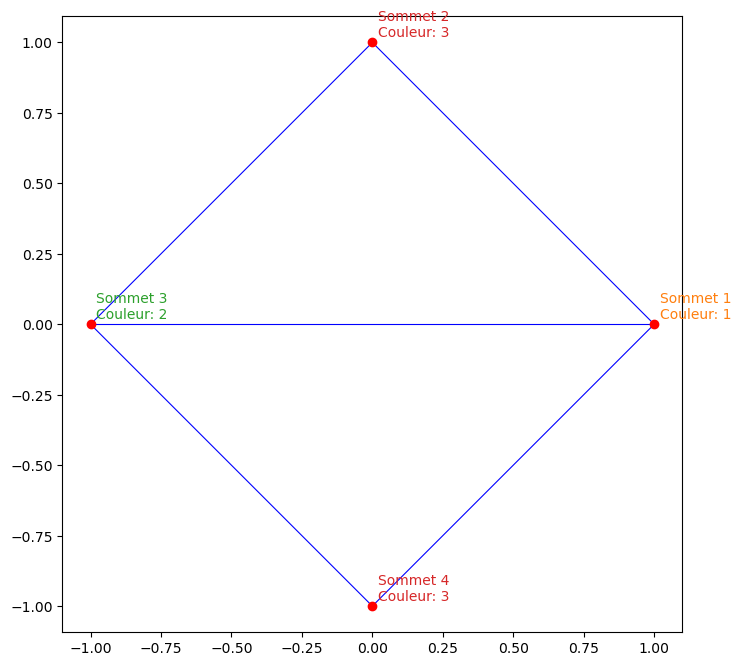

Coloriage du graphe 2
Le nombre chromatique du graphe est : 3
Couleurs assignées à chaque sommet :
Sommet 1 : Couleur 3
Sommet 2 : Couleur 1
Sommet 3 : Couleur 2
Sommet 4 : Couleur 3
Sommet 5 : Couleur 1


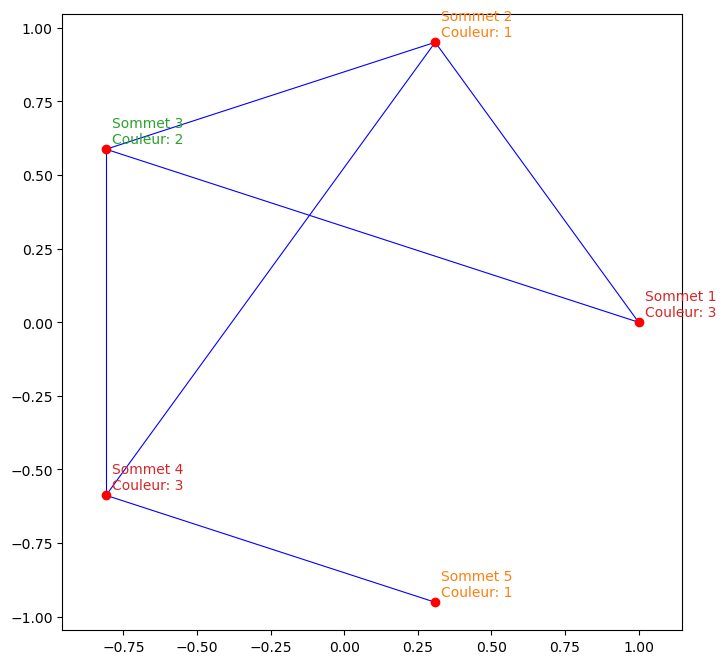

Coloriage du graphe 3
Le nombre chromatique du graphe est : 4
Couleurs assignées à chaque sommet :
Sommet 1 : Couleur 2
Sommet 2 : Couleur 3
Sommet 3 : Couleur 1
Sommet 4 : Couleur 1
Sommet 5 : Couleur 2
Sommet 6 : Couleur 4


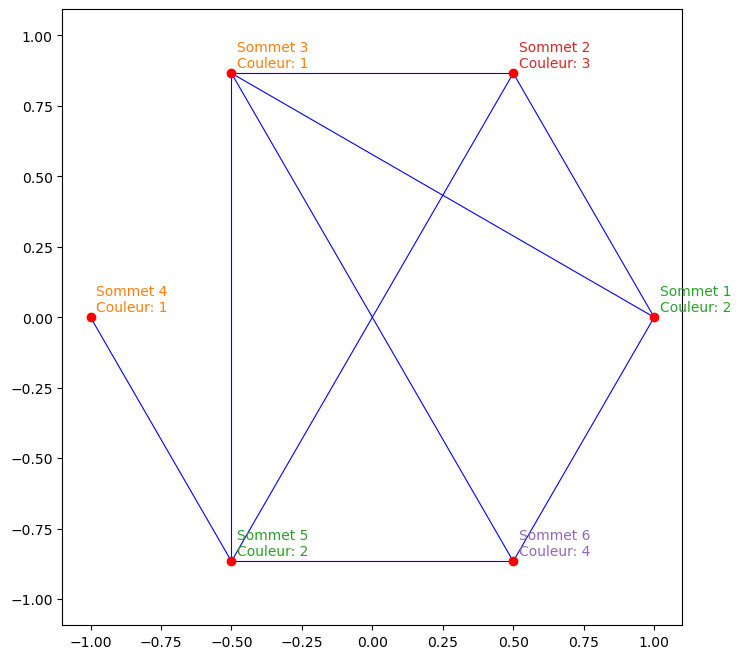

Coloriage du graphe 4
Le nombre chromatique du graphe est : 3
Couleurs assignées à chaque sommet :
Sommet 1 : Couleur 2
Sommet 2 : Couleur 3
Sommet 3 : Couleur 2
Sommet 4 : Couleur 1
Sommet 5 : Couleur 2
Sommet 6 : Couleur 1
Sommet 7 : Couleur 3


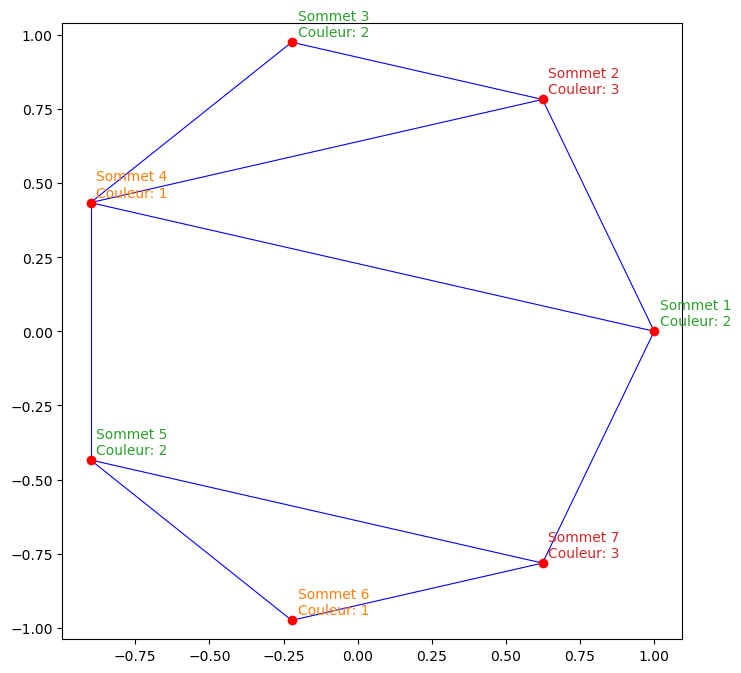

In [82]:
import numpy as np
import matplotlib.pyplot as plt

# Cette fonction prend une matrice M représentant un graphe orienté en paramètre et renvoie la matrice M1 représentant la version non orientée du graphe
def versionNo(M):
    M1 = np.zeros((M.shape[0], M.shape[1])) # Initialise une nouvelle matrice M1 de dimensions identiques à celles de la matrice M, remplie de zéros
    for i in range(M.shape[0]): # Boucle sur toutes les lignes de la matrice M
        for j in range(M.shape[1]): # À l'intérieur de la première boucle, boucle sur toutes les colonnes de la matrice M
            if M[i, j] == 1: # Vérifie si la valeur à la position (i, j) dans la matrice M est égale à 1
                M1[i, j] = 1 # Modifie la valeur correspondante dans la matrice M1 à 1
                M1[j, i] = 1 # Modifie également la valeur symétrique dans la matrice M1 (j, i) à 1
    return M1 # Renvoyer la matrice M1 qui stocke le résultat des modifications

"""
Cette fonction welsh_powell_algo implémente l'algorithme de coloration de graphes de Welsh-Powell. Cet algorithme attribue des couleurs aux sommets 
d'un graphe de manière à ce que deux sommets adjacents n'aient jamais la même couleur. L'objectif est de minimiser le nombre total de couleurs utilisées
"""
def welsh_powell_algo(adjacency_matrix):
    order = len(adjacency_matrix) # Calcule le nombre de sommets du graphe
    # Initialise une liste color_list avec des valeurs order + 1, représentant les couleurs attribuées à chaque sommet. 
    color_list = [order + 1] * order # Le choix de order + 1 comme couleur initiale permet de détecter les sommets non colorés.
    colored_vertex = [] # Initialise une liste vide pour suivre les sommets déjà colorés
    # Initialise des listes temporaires K et z pour les calculs dans l'algorithme.
    K = []
    z = []

    for c in range(order): # Boucle principale de l'algorithme qui itère pour chaque couleur

        # Trouver le sommet non coloré avec le plus grand nombre d'arêtes non colorées :        
        for i in range(order): # Boucle pour parcourir les sommets du graphe
            for j in range(order): # Boucle pour parcourir les sommets adjacents à chaque sommet
                if adjacency_matrix[i][j] == 1: # Vérifie si les sommets i et j sont adjacents
                    if i+1 not in colored_vertex: # Vérifie si le sommet i n'est pas déjà coloré
                        z.append(i+1) # Les sommets adjacents non colorés sont ajoutés à la liste temporaire  z                    
        w = max(set(z), key=z.count) # Trouve le sommet w avec le plus grand nombre d'arêtes adjacentes non colorées

        # Attribuer des couleurs :       
        for j in range(order): # Boucle pour parcourir les sommets adjacents à w
            if adjacency_matrix[w-1][j] == 1: # Vérifie si le sommet w est adjacent à j
                K.append(color_list[j]) # Ajoute la couleur du sommet j à la liste K (K stocke les couleurs des sommets adjacents à w)
        # Calcule la liste des couleurs disponibles pour le sommet w 
        diff_list = list(set(range(1, order + 1)) - set(K)) # Elle contient toutes les couleurs qui ne sont pas encore utilisées par les voisins du w
        color_list[w-1] = min(diff_list) # Attribue au sommet w la couleur minimale disponible (la plus petite couleur disponible)
        # Nettoie les listes temporaires K et diff_list pour la prochaine itération
        K.clear()
        diff_list.clear()
        colored_vertex.append(w) # Ajoute le sommet w à la liste des sommets colorés
        
        # Coloration des sommets restants :       
        for j in range(order): # Boucle pour parcourir les sommets adjacents à w qui ne sont pas encore colorés
            if adjacency_matrix[w-1][j] == 0: # Vérifie si le sommet w n'est pas adjacent à j
                if j+1 not in colored_vertex: # Vérifie si le sommet j n'est pas déjà coloré
                    if color_list[j] == order + 1: # Vérifie si le sommet j n'est pas encore coloré
                        for i in range(order): # Boucle pour parcourir et vérifier les sommets adjacents à j
                            if adjacency_matrix[j][i] == 1: # Vérifie si le sommet j est adjacent à i
                                K.append(color_list[i]) # Ajoute la couleur du sommet i à la liste K
                        if color_list[w-1] not in K: # Vérifie si la couleur de w n'est pas dans K (la liste des couleurs des sommets adjacents à j)
                            color_list[j] = color_list[w-1] # Attribue au sommet j la couleur de w (j prend la couleur de w)
                            colored_vertex.append(j+1) # Ajoute le sommet j à la liste des sommets colorés
                            w = j+1 # Met à jour w avec le sommet j
            K.clear() # Nettoie la liste temporaire K pour la prochaine itération

    # La fonction renvoie un dictionnaire où les clés sont les numéros de sommet et les valeurs sont les couleurs attribuées
    result = zip(range(1, order+1), color_list) # Crée une séquence de paires (sommet, couleur)
    return dict(result) # Convertit la séquence en un dictionnaire représentant la coloration du graphe

"""
Choix du sommet w avec le maximum d'arêtes adjacentes non colorées : En choisissant w comme le sommet non coloré avec le plus grand nombre d'arêtes 
adjacentes non colorées, on maximise la chance de trouver un sommet qui pourrait potentiellement nécessiter une couleur distincte. Cela contribue à 
minimiser le nombre total de couleurs utilisées.

Attribution de la couleur minimale à w : En attribuant à w la couleur minimale qui n'est pas déjà utilisée par ses voisins, on favorise l'utilisation 
de couleurs inférieures, ce qui contribue à minimiser le nombre total de couleurs nécessaires.
"""

def chromaticNumber(colorArray):
    return len(set(colorArray))
    
def plotGraph(adjacency_matrix, colors):
    V = adjacency_matrix.shape[0]
    x = np.cos(2 * np.pi * np.arange(V) / V)
    y = np.sin(2 * np.pi * np.arange(V) / V)

    N = versionNo(adjacency_matrix)  # Calcul de la version non orientée du graphe

    plt.figure(figsize=(8, 8))
    plt.axis('equal')

    # Create undirected graph
    for i in range(V):
        for j in range(i + 1, V):
            if N[i][j] == 1:  # Utilisation de la version non orientée
                plt.plot([x[i], x[j]], [y[i], y[j]], color='blue', linestyle='-', linewidth=0.8)

    # Add nodes with red color
    plt.plot(x, y, color='red', linestyle='', marker='o')

    # Add node numbers and assigned colors
    for i in range(V):
        plt.text(x[i] + 0.02, y[i] + 0.02, f"Sommet {i + 1}\nCouleur: {colors[i + 1]}", fontsize=10, color=f'C{colors[i + 1]}')

    # Display chromatic number
    chromatic_number = chromaticNumber(list(colors.values()))
    print(f"Le nombre chromatique du graphe est : {chromatic_number}")

    # Display assigned colors
    print("Couleurs assignées à chaque sommet :")
    for node, color in colors.items():
        print(f"Sommet {node} : Couleur {color}")

    plt.show()

# Exemple de Graphe 1
g1 = np.array([
    [0, 1, 1, 1],
    [1, 0, 1, 0],
    [1, 1, 0, 1],
    [1, 0, 1, 0],
])
print("Coloriage du graphe 1")
coloring1 = welsh_powell_algo(versionNo(g1))
plotGraph(versionNo(g1), coloring1)

# Exemple de Graphe 2
g2 = np.array([[0, 1, 1, 0, 0],
               [1, 0, 1, 1, 0],
               [1, 1, 0, 1, 0],
               [0, 1, 1, 0, 1],
               [0, 0, 0, 1, 0]])
print("Coloriage du graphe 2")
coloring2 = welsh_powell_algo(versionNo(g2))
plotGraph(versionNo(g2), coloring2)

# Exemple de Graphe 3
g3 = np.array([[0, 1, 1, 0, 0, 1],
               [1, 0, 1, 0, 1, 0],
               [1, 1, 0, 0, 1, 0],
               [0, 0, 0, 0, 1, 0],
               [0, 1, 1, 1, 0, 1],
               [1, 0, 1, 0, 1, 1]])
print("Coloriage du graphe 3")
coloring3 = welsh_powell_algo(versionNo(g3))
plotGraph(versionNo(g3), coloring3)

# Exemple de Graphe 4
g4 = np.array([
    [0, 1, 0, 1, 0, 0, 1],
    [1, 0, 1, 1, 0, 0, 0],
    [0, 1, 0, 1, 0, 0, 0],
    [1, 1, 1, 0, 1, 0, 0],
    [0, 0, 0, 1, 0, 1, 1],
    [0, 0, 0, 0, 1, 0, 1],
    [1, 0, 0, 0, 1, 1, 0]
])
print("Coloriage du graphe 4")
coloring4 = welsh_powell_algo(versionNo(g4))
plotGraph(versionNo(g4), coloring4)

# Graphe Dynamique: l'algorithme de coloration cohérente (Connected Component Coloring)

Entrer le nombre de sommets pour le graphe 1:  6
Entrer le nombre d'arêtes pour le graphe 1:  10
Entrer une arête (format: v1 v2):  1 2
Entrer une arête (format: v1 v2):  1 3
Entrer une arête (format: v1 v2):  1 6
Entrer une arête (format: v1 v2):  2 3
Entrer une arête (format: v1 v2):  2 5
Entrer une arête (format: v1 v2):  3 5
Entrer une arête (format: v1 v2):  3 6
Entrer une arête (format: v1 v2):  4 5
Entrer une arête (format: v1 v2):  5 6
Entrer une arête (format: v1 v2):  6 4



Colored Dynamic Graph:
Vertices: {1: {frozenset({1, 6}), frozenset({1, 3}), frozenset({1, 2})}, 2: {frozenset({2, 5}), frozenset({2, 3}), frozenset({1, 2})}, 3: {frozenset({3, 6}), frozenset({1, 3}), frozenset({2, 3}), frozenset({3, 5})}, 4: {frozenset({4, 5}), frozenset({4, 6})}, 5: {frozenset({4, 5}), frozenset({5, 6}), frozenset({2, 5}), frozenset({3, 5})}, 6: {frozenset({1, 6}), frozenset({5, 6}), frozenset({3, 6}), frozenset({4, 6})}}
Edges: {frozenset({4, 6}), frozenset({2, 3}), frozenset({1, 2}), frozenset({4, 5}), frozenset({3, 6}), frozenset({2, 5}), frozenset({5, 6}), frozenset({3, 5}), frozenset({1, 6}), frozenset({1, 3})}
Colors: {1: 1, 2: 2, 3: 3, 4: 3, 5: 1, 6: 2}
Nombre chromatique du graphe 1:  3


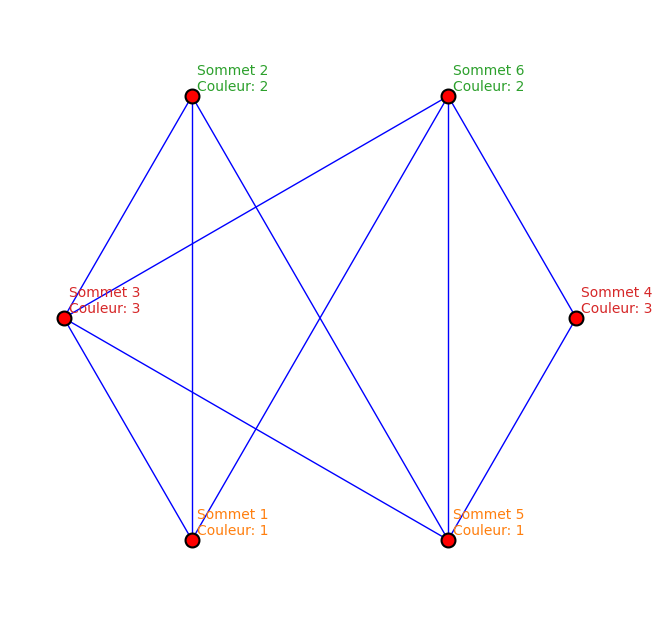

In [78]:
import numpy as np
import matplotlib.pyplot as plt
from collections import deque
import networkx as nx

class DynamicGraph: # une classe DynamicGraph est définie pour représenter un graphe dynamique
    def __init__(self): # Ce graphe a des attributs suivants pour stocker les informations sur le graphe:  
        self.vertices = {} # vertices (un dictionnaire)
        self.edges = set() # edges (un ensemble)
        self.colors = {} # et colors (un dictionnaire)
        self.edges_added = set()  # Ajouter cette ligne pour initialiser l'attribut edges_added
        
    def add_vertex(self, vertex): # Cette méthode ajoute un sommet 'vertex' au graphe
        if vertex not in self.vertices: # vérifie si le sommet 'vertex' n'est pas déjà dans le graphe
            self.vertices[vertex] = set() # ajoute le sommet 'vertex' au dictionnaire 'vertices'
            self.colors[vertex] = None # initialise la couleur du sommet 'vertex' à None
            
    def add_edge(self, edge): # Cette méthode ajoute une arête au graphe        
        self.edges.add(frozenset(edge)) # ajoute une arête au graphe sous forme d'un frozenset pour garantir l'immutabilité et l'unicité des arêtes
        for vertex in edge: # parcourt chaque sommet dans l'arête ce qui est représentée par une paire non ordonnée de sommets
            self.vertices[vertex].add(frozenset(edge)) # ajoute 'edge' à 'vertices'. Pour ∀ sommet de 'edge', ajoute l'arête auquel ce sommet appartient
                        
    def color_graph(self): # Cette méthode colorie l'ensemble du graphe de manière cohérente
        m = len(self.vertices) # calcule le nombre total de sommets dans le graphe
        for vertex in self.vertices: # parcourt tous les sommets du graph
            if self.colors[vertex] is None: # vérifie si le sommet actuel (vertex) n'a pas encore de couleur attribuée
                self.color_connected_component(vertex) # colore la CC contenant 'vertex' et met à jour les couleurs des sommets dans cette CC

    """
    Cette méthode 'color_connected_component' explore la CC du sommet initial, attribuant des couleurs cohérentes aux sommets 
    en évitant les couleurs déjà utilisées par les voisins
    """
    def color_connected_component(self, start_vertex):
        queue = deque([start_vertex]) # Crée une deque 'queue' avec le sommet initial comme élément unique pour parcourir les sommets de la CC
        used_colors = set() # Initialise un ensemble vide 'used_colors' pour suivre les couleurs déjà utilisées dans la CC

        while queue: # boucle qui continue tant que la file d'attente n'est pas vide (càd qu'il reste des sommets à explorer dans la CC)
            current_vertex = queue.popleft() # Retire et récupère 1e sommet de 'queue'. Il est actuellement examiné dans le processus de coloration
            available_colors = set(range(1, len(self.vertices) + 1)) # Initialise un ensemble de couleurs disponibles (de 1 au nombre total de sommets)

            for edge in self.vertices[current_vertex]: # Parcourt toutes les arêtes (edges) associées au sommet actuel dans le dictionnaire vertices
                adjacent_vertex = next(iter(set(edge) - {current_vertex})) # Détermine le sommet adjacent au sommet actuel via l'arête en cours d'examen

                if adjacent_vertex in self.colors and self.colors[adjacent_vertex] is not None: # Vérifie si le sommet adj a déjà 1 couleur attribuée
                    available_colors.discard(self.colors[adjacent_vertex]) # cette couleur est retirée de l'ensemble des couleurs disponibles

            if available_colors: # Vérifie si des couleurs sont disponibles après avoir examiné les voisins
                # Modification pour s'assurer que la couleur du sommet associée à la nouvelle arête est différente
                if current_vertex in self.edges_added: # Vérifie si le sommet actuel est associé à une nouvelle arête ajoutée
                    available_colors.discard(self.colors[current_vertex]) # Supprime la couleur du sommet actuel de l'ensemble des couleurs disponibles

                color = min(available_colors) # choisit la plus petite couleur disponible
                self.colors[current_vertex] = color # Attribue cette couleur au sommet actuel dans le dictionnaire 'colors'
                used_colors.add(color) # Ajoute la couleur utilisée à l'ensemble des couleurs déjà utilisées 'used_colors'

                for edge in self.vertices[current_vertex]: # Parcourt à nouveau les arêtes associées au sommet actuel
                    adjacent_vertex = next(iter(set(edge) - {current_vertex})) # Détermine à nouveau le sommet adjacent à partir de l'arête

                    # Vérifie si le sommet adj n'a pas encore de couleur attribuée
                    if adjacent_vertex in self.colors and self.colors[adjacent_vertex] is None: 
                        queue.append(adjacent_vertex) # Ajoute le sommet adjacent à la file d'attente pour le traiter ultérieurement

                if self.edges_added: # Vérifie si de nouvelles arêtes ont été ajoutées au graphe
                    for vertex in self.edges_added: # Itère sur les sommets associés aux arêtes nouvellement ajoutées
                        # Vérifie si le sommet n'est pas le sommet actuel et n'a pas encore été ajouté à 'deque'
                        if vertex != current_vertex and vertex not in queue: 
                            queue.append(vertex) # ajoute le sommet à la file pour un traitement ultérieur

            else: # Si aucune couleur n'est disponible pour le sommet actuel
                new_color = max(used_colors) + 1 # Trouve la couleur maximale utilisée et l'incrémente pour obtenir une nouvelle couleur
                self.colors[current_vertex] = new_color # Attribue la nouvelle couleur au sommet actuel
                used_colors.add(new_color) # Ajoute la nouvelle couleur à l'ensemble des couleurs utilisées

                for edge in self.vertices[current_vertex]: #  Itère sur les arêtes du sommet actuel
                    adjacent_vertex = next(iter(set(edge) - {current_vertex})) # Détermine le sommet adjacent au sommet actuel dans l'arête actuelle

                    # Vérifie si le sommet adjacent n'a pas encore été attribué une couleur
                    if adjacent_vertex in self.colors and self.colors[adjacent_vertex] is None:
                        queue.append(adjacent_vertex) # ajoute le sommet adjacent à la file pour un traitement ultérieur

        self.edges_added = set()  # Réinitialise l'ensemble des arêtes ajoutées après le traitement de la composante connectée
        self.chromatic_number() # Met à jour le nombre chromatique après que la composante connectée a été colorée

    """ 
    Cette méthode met à jour les couleurs du graphe après une modification. Elle prend en charge deux paramètres optionnels : modified_vertex 
    et modified_edge. Ces paramètres indiquent quel sommet ou quelle arête a été modifié. 
    """
    def update_graph_after_modification(self, modified_vertex=None, modified_edge=None): 
        if modified_vertex: # Vérifie si un sommet a été modifié
            self.color_connected_component(modified_vertex) # met à jour des couleurs de la composante connectée du sommet modifié

        if modified_edge: # Vérifie si une arête a été modifiée
            for vertex in modified_edge: # Parcourt chaque sommet dans la liste modified_edge pour traiter chaque sommet de l'arête modifiée
                self.color_connected_component(vertex) # la composante connectée de chaque sommet de l'arête modifiée est mise à jour
    
    def plotGraph(self):
        # Extrait les informations pertinentes du graphe dynamique, notamment les sommets, les arêtes et les couleurs associées
        vertices = self.vertices
        edges = self.edges
        colors = self.colors
    
        # Calcule le nombre de sommets dans le graphe pour déterminer la taille de la matrice
        V = len(vertices)
    
        # Calcule les positions des sommets dans le plan en utilisant circular_layout
        pos = nx.circular_layout(nx.Graph(edges))
    
        plt.figure(figsize=(8, 8))
        plt.axis('equal')
    
        # Trace les arêtes du graphe en utilisant networkx.draw
        nx.draw(nx.Graph(edges), pos, with_labels=False, font_weight='bold', node_color='blue', font_color='black',
                font_size=10, node_size=100, edge_color='blue', linewidths=0.8, edgecolors='black')
    
        # Sélectionner uniquement les sommets qui ont des positions calculées (pos). 
        # Certains sommets peuvent ne pas être présents dans pos s'ils n'ont pas d'arêtes.
        valid_nodes = [v for v in vertices.keys() if v in pos]
        nx.draw_networkx_nodes(nx.Graph(edges), pos, nodelist=valid_nodes, node_color='red',
                               node_size=100, edgecolors='black', linewidths=1.5)
    
        # Ajoute du texte à la position du sommet pour afficher le numéro du sommet et la couleur attribuée
        for i in range(1, V + 1):
            if i in pos:  # Vérifie si le sommet a une position calculée (pos)
                plt.text(pos[i][0] + 0.02, pos[i][1] + 0.02, f"Sommet {i}\nCouleur: {colors.get(i, 'N/A')}", fontsize=10,
                         color=f'C{colors.get(i, "N/A")}')
    
        plt.show()

    def display_colored_graph(self): # Cette méthode est responsable de l'affichage des informations relatives au graphe coloré
        print("\nColored Dynamic Graph:") 
        print("Vertices:", self.vertices) # Affiche les sommets du graphe et leurs ensembles d'arêtes associés
        print("Edges:", self.edges) # Affiche l'ensemble des arêtes du graphe
        print("Colors:", self.colors) # Affiche les couleurs attribuées à chaque sommet du graphe
        
    def chromatic_number(self): # Cette méthode calcule le nombre chromatique du graphe
        self.color_graph() # attribuer des couleurs aux sommets du graphe si ce n'est pas déjà fait
        return len(set(self.colors.values())) # Retourne le nombre chromatique du graphe
        
# Exemple de Graphe 1
dynamic_graph1 = DynamicGraph()

# Ajouter des sommets en utilisant input()
num_vertices = int(input("Entrer le nombre de sommets pour le graphe 1: "))
for i in range(1, num_vertices + 1):
    dynamic_graph1.add_vertex(i)

# Ajouter des arêtes en utilisant input()
num_edges = int(input("Entrer le nombre d'arêtes pour le graphe 1: "))
for _ in range(num_edges):
    while True:
        try:
            edge_input = input("Entrer une arête (format: v1 v2): ")
            edge_vertices = list(map(int, edge_input.split()))
            if all(v in dynamic_graph1.vertices for v in edge_vertices):
                dynamic_graph1.add_edge(set(edge_vertices))
                break
            else:
                print("Sommets ou Arêtes invalides. Veuillez saisir des sommets qui existent dans le graphe.")
        except ValueError:
            print("Données invalides. Veuillez saisir des sommet en tant qu'entiers séparés par un espace.")

# Afficher le graphe coloré 1
dynamic_graph1.color_graph()
dynamic_graph1.display_colored_graph()
print("Nombre chromatique du graphe 1: ", dynamic_graph1.chromatic_number())
dynamic_graph1.plotGraph()  # Affiche le graphe coloré 1

Entrer le nombre de sommets pour le graphe 1:  4
Entrer le nombre d'arêtes pour le graphe 1:  5
Entrer une arête (format: v1 v2):  1 2
Entrer une arête (format: v1 v2):  1 3
Entrer une arête (format: v1 v2):  1 4
Entrer une arête (format: v1 v2):  2 3
Entrer une arête (format: v1 v2):  3 4



Colored Dynamic Graph:
Vertices: {1: {frozenset({1, 4}), frozenset({1, 3}), frozenset({1, 2})}, 2: {frozenset({2, 3}), frozenset({1, 2})}, 3: {frozenset({3, 4}), frozenset({1, 3}), frozenset({2, 3})}, 4: {frozenset({3, 4}), frozenset({1, 4})}}
Edges: {frozenset({3, 4}), frozenset({1, 4}), frozenset({2, 3}), frozenset({1, 2}), frozenset({1, 3})}
Colors: {1: 1, 2: 2, 3: 3, 4: 2}
Nombre chromatique du graphe 1:  3


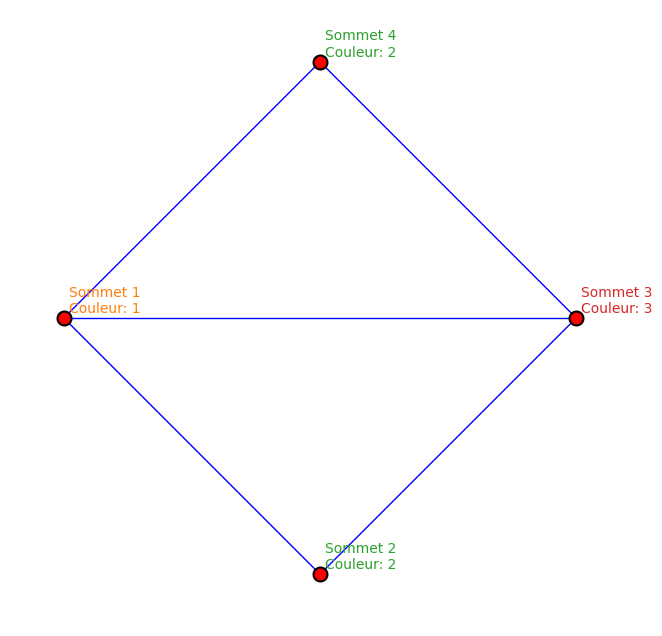

Entrer le sommet pour supprimer du graphe 1:  3



Colored Dynamic Graph:
Vertices: {1: {frozenset({1, 4}), frozenset({1, 2})}, 2: {frozenset({1, 2})}, 4: {frozenset({1, 4})}}
Edges: {frozenset({1, 4}), frozenset({1, 2})}
Colors: {1: 1, 2: 2, 4: 2}
Nombre chromatique du graphe 1 après suppression du sommet 3:  2


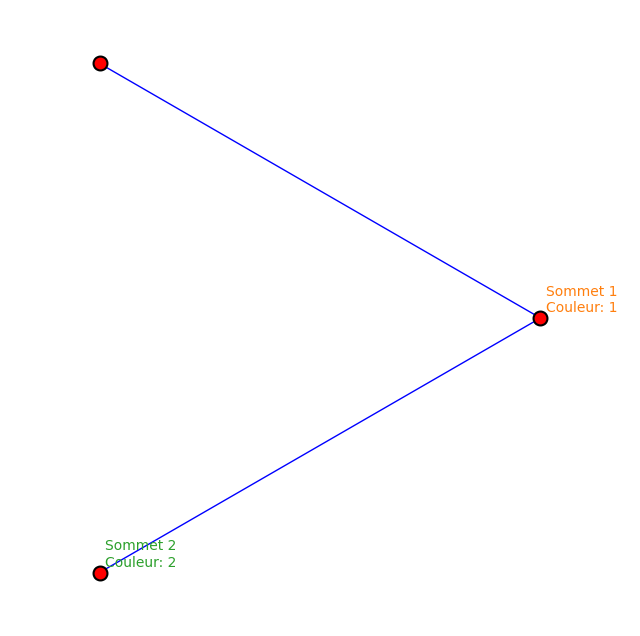

Entrer l'arête à supprimer (format: v1 v2):  4 1



Colored Dynamic Graph:
Vertices: {1: {frozenset({1, 2})}, 2: {frozenset({1, 2})}, 4: set()}
Edges: {frozenset({1, 2})}
Colors: {1: 1, 2: 2, 4: 1}
Nombre chromatique du graphe 1 après suppression de l'arête 4 1:  2


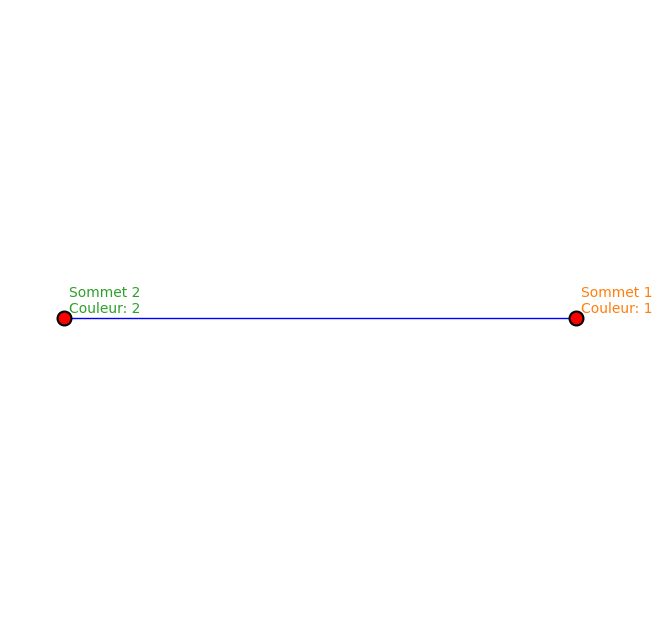

Entrer le sommet à ajouter après la suppression de l'arête:  3



Colored Dynamic Graph:
Vertices: {1: {frozenset({1, 2})}, 2: {frozenset({1, 2})}, 4: set(), 3: set()}
Edges: {frozenset({1, 2})}
Colors: {1: 1, 2: 2, 4: 1, 3: 1}
Nombre chromatique du graphe 1 après ajout du sommet 3:  2


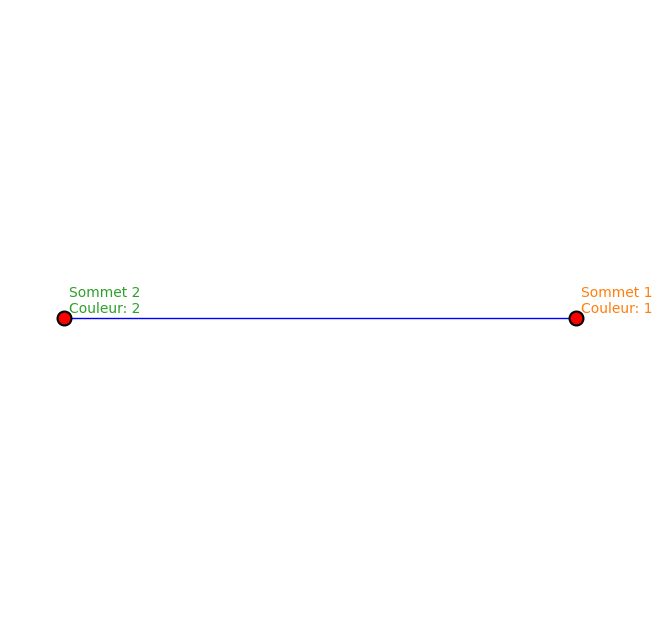

Entrer la nouvelle arête à ajouter (format: v1 v2):  3 1



Colored Dynamic Graph:
Vertices: {1: {frozenset({1, 3}), frozenset({1, 2})}, 2: {frozenset({1, 2})}, 4: set(), 3: {frozenset({1, 3})}}
Edges: {frozenset({1, 2}), frozenset({1, 3})}
Colors: {1: 1, 2: 2, 4: 1, 3: 1}
Nombre chromatique du graphe 1 après ajout de la nouvelle arête 3 1:  2


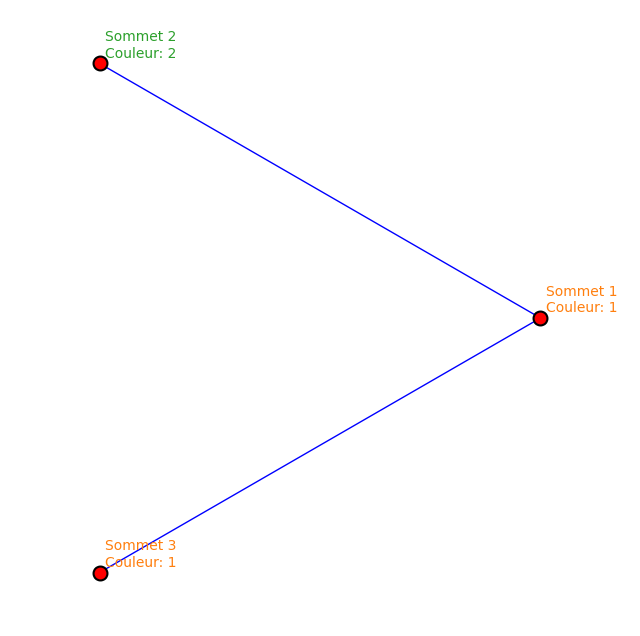

In [79]:
import numpy as np
import matplotlib.pyplot as plt
from collections import deque
import networkx as nx

class DynamicGraph: # une classe DynamicGraph est définie pour représenter un graphe dynamique
    def __init__(self): # Ce graphe a des attributs suivants pour stocker les informations sur le graphe:  
        self.vertices = {} # vertices (un dictionnaire) pour stocker les sommets du graphe
        self.edges = set() # edges (un ensemble) pour stocker les arêtes du graphe
        self.colors = {} # colors (un dictionnaire) pour stocker les couleurs attribuées à chaque sommet du graphe
        self.edges_added = set()  # et edges_added pour suivre les arêtes qui ont été ajoutées au graphe
        
    def add_vertex(self, vertex): # Cette méthode ajoute un sommet 'vertex' au graphe
        if vertex not in self.vertices: # vérifie si le sommet 'vertex' n'est pas déjà dans le graphe
            self.vertices[vertex] = set() # ajoute le sommet 'vertex' au dictionnaire 'vertices'
            self.colors[vertex] = None # initialise la couleur du sommet 'vertex' à None
            
    # Cette méthode retire un sommet du graphe, et toutes les arêtes associées à ce sommet, et met à jour les couleurs des sommets dans la composante 
    # connectée où le sommet était inclus
    def remove_vertex(self, vertex): 
        if vertex in self.vertices: # vérifie si le sommet 'vertex' est présent dans le dictionnaire 'vertices' du graphe
            edges_to_remove = {edge for edge in self.edges if vertex in edge} # crée un ensemble contenant toutes les arêtes qui ont 'vertex'
            for edge in edges_to_remove: # parcourt chaque arête 'edge' dans 'edges_to_remove'
                for v in edge: # parcourt chaque sommet dans l'arête 'edge'
                    self.vertices[v].remove(frozenset(edge))  # supprime l'arête 'edge' de l'ensemble des arêtes associées à chaque sommet du graphe
    
            self.colors[vertex] = None # Définit la couleur du sommet 'vertex' supprimé à None
            self.edges -= edges_to_remove # Supprime les arêtes associées au sommet supprimé du dictionnaire 'edges' du graphe
            self.color_connected_component(vertex) # Met à jour les couleurs des composantes connectées après la suppression du sommet 'vertex'
            del self.vertices[vertex] # Supprime le sommet 'vertex' du graphe en le retirant du dictionnaire 'vertices'
            del self.colors[vertex] # Supprime les informations de couleur associées au sommet 'vertex' supprimé du dictionnaire 'colors' du graphe

    def add_edge(self, edge): # Cette méthode ajoute une arête au graphe        
        self.edges.add(frozenset(edge)) # ajoute une arête au graphe sous forme d'un frozenset pour garantir l'immutabilité et l'unicité des arêtes
        for vertex in edge: # parcourt chaque sommet dans l'arête ce qui est représentée par une paire non ordonnée de sommets
            self.vertices[vertex].add(frozenset(edge)) # ajoute 'edge' à 'vertices'. Pour ∀ sommet de 'edge', ajoute l'arête auquel ce sommet appartient
        
    def remove_edge(self, edge): # Cette méthode est utilisée pour retirer une arête du graphe dynamique
        if frozenset(edge) in self.edges: # Vérifie si l'arête spécifiée par le paramètre 'edge' est présente dans l'ensemble des arêtes du graphe
            self.edges_added = set()  # Initialise un ensemble pour suivre les arêtes qui ont été ajoutées ou modifiées lors du processus de suppression
            for vertex in edge: # Itère sur chaque sommet de l'arête
                self.color_connected_component(vertex) # mettre à jour les couleurs dans la composante connectée du sommet 'vertex'
    
            self.edges.remove(frozenset(edge)) # Retire l'arête spécifiée de l'ensemble des arêtes self.edges du graphe
            for vertex in edge: # Itère sur chaque sommet de l'arête
                self.vertices[vertex].remove(frozenset(edge)) # Retire 'edge' de l'ensemble d'arêtes associé à 'vertex' dans self.vertices

            # Mettre à jour les couleurs après le retrait des arêtes
            for vertex in edge: # Itère sur chaque sommet de l'arête
                self.color_connected_component(vertex) # pour mettre à jour les couleurs dans la composante connectée du sommet 'vertex'
    
            # Réinitialise l'ensemble edges_added à vide après le traitement de la suppression de l'arête pour d'éventuelles futures modifications
            self.edges_added = set()
                
    def color_graph(self): # Cette méthode colorie l'ensemble du graphe de manière cohérente
        m = len(self.vertices) # calcule le nombre total de sommets dans le graphe
        for vertex in self.vertices: # parcourt tous les sommets du graph
            if self.colors[vertex] is None: # vérifie si le sommet actuel (vertex) n'a pas encore de couleur attribuée
                self.color_connected_component(vertex) # colore la CC contenant 'vertex' et met à jour les couleurs des sommets dans cette CC

    """
    Cette méthode 'color_connected_component' explore la CC du sommet initial, attribuant des couleurs cohérentes aux sommets 
    en évitant les couleurs déjà utilisées par les voisins
    """
    def color_connected_component(self, start_vertex):
        queue = deque([start_vertex]) # Crée une deque 'queue' avec le sommet initial comme élément unique pour parcourir les sommets de la CC
        used_colors = set() # Initialise un ensemble vide 'used_colors' pour suivre les couleurs déjà utilisées dans la CC

        while queue: # boucle qui continue tant que la file d'attente n'est pas vide (càd qu'il reste des sommets à explorer dans la CC)
            current_vertex = queue.popleft() # Retire et récupère 1e sommet de 'queue'. Il est actuellement examiné dans le processus de coloration
            available_colors = set(range(1, len(self.vertices) + 1)) # Initialise un ensemble de couleurs disponibles (de 1 au nombre total de sommets)

            for edge in self.vertices[current_vertex]: # Parcourt toutes les arêtes (edges) associées au sommet actuel dans le dictionnaire vertices
                adjacent_vertex = next(iter(set(edge) - {current_vertex})) # Détermine le sommet adjacent au sommet actuel via l'arête en cours d'examen

                if adjacent_vertex in self.colors and self.colors[adjacent_vertex] is not None: # Vérifie si le sommet adj a déjà 1 couleur attribuée
                    available_colors.discard(self.colors[adjacent_vertex]) # cette couleur est retirée de l'ensemble des couleurs disponibles

            if available_colors: # Vérifie si des couleurs sont disponibles après avoir examiné les voisins
                # Modification pour s'assurer que la couleur du sommet associée à la nouvelle arête est différente
                if current_vertex in self.edges_added: # Vérifie si le sommet actuel est associé à une nouvelle arête ajoutée
                    available_colors.discard(self.colors[current_vertex]) # Supprime la couleur du sommet actuel de l'ensemble des couleurs disponibles

                color = min(available_colors) # choisit la plus petite couleur disponible
                self.colors[current_vertex] = color # Attribue cette couleur au sommet actuel dans le dictionnaire 'colors'
                used_colors.add(color) # Ajoute la couleur utilisée à l'ensemble des couleurs déjà utilisées 'used_colors'

                for edge in self.vertices[current_vertex]: # Parcourt à nouveau les arêtes associées au sommet actuel
                    adjacent_vertex = next(iter(set(edge) - {current_vertex})) # Détermine à nouveau le sommet adjacent à partir de l'arête

                    # Vérifie si le sommet adj n'a pas encore de couleur attribuée
                    if adjacent_vertex in self.colors and self.colors[adjacent_vertex] is None: 
                        queue.append(adjacent_vertex) # Ajoute le sommet adjacent à la file d'attente pour le traiter ultérieurement

                if self.edges_added: # Vérifie si de nouvelles arêtes ont été ajoutées au graphe
                    for vertex in self.edges_added: # Itère sur les sommets associés aux arêtes nouvellement ajoutées
                        # Vérifie si le sommet n'est pas le sommet actuel et n'a pas encore été ajouté à 'deque'
                        if vertex != current_vertex and vertex not in queue: 
                            queue.append(vertex) # ajoute le sommet à la file pour un traitement ultérieur

            else: # Si aucune couleur n'est disponible pour le sommet actuel
                new_color = max(used_colors) + 1 # Trouve la couleur maximale utilisée et l'incrémente pour obtenir une nouvelle couleur
                self.colors[current_vertex] = new_color # Attribue la nouvelle couleur au sommet actuel
                used_colors.add(new_color) # Ajoute la nouvelle couleur à l'ensemble des couleurs utilisées

                for edge in self.vertices[current_vertex]: #  Itère sur les arêtes du sommet actuel
                    adjacent_vertex = next(iter(set(edge) - {current_vertex})) # Détermine le sommet adjacent au sommet actuel dans l'arête actuelle

                    # Vérifie si le sommet adjacent n'a pas encore été attribué une couleur
                    if adjacent_vertex in self.colors and self.colors[adjacent_vertex] is None:
                        queue.append(adjacent_vertex) # ajoute le sommet adjacent à la file pour un traitement ultérieur

        self.edges_added = set()  # Réinitialise l'ensemble des arêtes ajoutées après le traitement de la composante connectée
        self.chromatic_number() # Met à jour le nombre chromatique après que la composante connectée a été colorée

    """ 
    Cette méthode met à jour les couleurs du graphe après une modification. Elle prend en charge deux paramètres optionnels : modified_vertex 
    et modified_edge. Ces paramètres indiquent quel sommet ou quelle arête a été modifié. 
    """
    def update_graph_after_modification(self, modified_vertex=None, modified_edge=None): 
        if modified_vertex: # Vérifie si un sommet a été modifié
            self.color_connected_component(modified_vertex) # met à jour des couleurs de la composante connectée du sommet modifié

        if modified_edge: # Vérifie si une arête a été modifiée
            for vertex in modified_edge: # Parcourt chaque sommet dans la liste modified_edge pour traiter chaque sommet de l'arête modifiée
                self.color_connected_component(vertex) # la composante connectée de chaque sommet de l'arête modifiée est mise à jour
    
    def plotGraph(self):
        # Extrait des informations nécessaires du graphe dynamique, y compris les sommets, les arêtes et les couleurs
        vertices = self.vertices
        edges = self.edges
        colors = self.colors
    
        # Calcul de la nouvelle taille de la matrice basée sur le nombre de sommets dans le graphe
        V = len(vertices)
    
        # Calcul des nouvelles positions des nœuds à l'aide de circular_layout de networkx
        pos = nx.circular_layout(nx.Graph(edges))
    
        plt.figure(figsize=(8, 8))
        plt.axis('equal')
    
        # Trace les arêtes du graphe
        nx.draw(nx.Graph(edges), pos, with_labels=False, font_weight='bold', node_color='blue', font_color='black',
                font_size=10, node_size=100, edge_color='blue', linewidths=0.8, edgecolors='black')
    
        # Trace les nœuds du graphe. Les nœuds valides sont ceux qui ont des positions définies (if v in pos). La couleur des nœuds est en rouge
        valid_nodes = [v for v in vertices.keys() if v in pos]
        nx.draw_networkx_nodes(nx.Graph(edges), pos, nodelist=valid_nodes, node_color='red',
                               node_size=100, edgecolors='black', linewidths=1.5)
    
        # Ajoute du texte à la figure, affichant le numéro du sommet et sa couleur assignée
        for i in range(1, V + 1):
            if i in pos:  # Vérifiez si le nœud est dans le dictionnaire 'pos'
                plt.text(pos[i][0] + 0.02, pos[i][1] + 0.02, f"Sommet {i}\nCouleur: {colors.get(i, 'N/A')}", fontsize=10,
                         color=f'C{colors.get(i, "N/A")}')
    
        plt.show()

    def display_colored_graph(self): # Cette méthode est responsable de l'affichage des informations relatives au graphe coloré
        print("\nColored Dynamic Graph:") 
        print("Vertices:", self.vertices) # Affiche les sommets du graphe et leurs ensembles d'arêtes associés
        print("Edges:", self.edges) # Affiche l'ensemble des arêtes du graphe
        print("Colors:", self.colors) # Affiche les couleurs attribuées à chaque sommet du graphe
        
    def chromatic_number(self): # Cette méthode calcule le nombre chromatique du graphe
        self.color_graph() # attribuer des couleurs aux sommets du graphe si ce n'est pas déjà fait
        return len(set(self.colors.values())) # Retourne le nombre chromatique du graphe
        
# Exemple de Graphe 1
dynamic_graph1 = DynamicGraph()

# Ajouter des sommets en utilisant input()
num_vertices = int(input("Entrer le nombre de sommets pour le graphe 1: "))
for i in range(1, num_vertices + 1):
    dynamic_graph1.add_vertex(i)

# Ajouter des arêtes en utilisant input()
num_edges = int(input("Entrer le nombre d'arêtes pour le graphe 1: "))
for _ in range(num_edges):
    while True:
        try:
            edge_input = input("Entrer une arête (format: v1 v2): ")
            edge_vertices = list(map(int, edge_input.split()))
            if all(v in dynamic_graph1.vertices for v in edge_vertices):
                dynamic_graph1.add_edge(set(edge_vertices))
                break
            else:
                print("Sommets ou Arêtes invalides. Veuillez saisir des sommets qui existent dans le graphe.")
        except ValueError:
            print("Données invalides. Veuillez saisir des sommet en tant qu'entiers séparés par un espace.")

# Afficher le graphe coloré 1
dynamic_graph1.color_graph()
dynamic_graph1.display_colored_graph()
print("Nombre chromatique du graphe 1: ", dynamic_graph1.chromatic_number())
dynamic_graph1.plotGraph()  # Affiche le graphe coloré 1

# Supprimer un sommet
vertex_to_remove = int(input("Entrer le sommet pour supprimer du graphe 1: "))
dynamic_graph1.remove_vertex(vertex_to_remove)

# Afficher le graphe coloré 1 après la suppression d'un sommet
dynamic_graph1.color_graph()
dynamic_graph1.display_colored_graph()
print("Nombre chromatique du graphe 1 après suppression du sommet {}: ".format(vertex_to_remove), dynamic_graph1.chromatic_number())
dynamic_graph1.plotGraph()  # Affiche le graphe coloré 1 après la suppression du sommet

# Supprimer une arête (après avoir supprimé un sommet)
edge_to_remove = input("Entrer l'arête à supprimer (format: v1 v2): ")
edge_vertices_to_remove = list(map(int, edge_to_remove.split()))
dynamic_graph1.remove_edge(edge_vertices_to_remove)

# Afficher le graphe coloré 1 après la suppression d'une arête
dynamic_graph1.color_graph()
dynamic_graph1.display_colored_graph()
print("Nombre chromatique du graphe 1 après suppression de l'arête {}: ".format(edge_to_remove), dynamic_graph1.chromatic_number())
dynamic_graph1.plotGraph()  # Affiche le graphe coloré 1 après la suppression de l'arête

# Ajouter un sommet après avoir supprimé une arête
new_vertex = int(input("Entrer le sommet à ajouter après la suppression de l'arête: "))
dynamic_graph1.add_vertex(new_vertex)

# Afficher le graphe coloré 1 après l'ajout du sommet
dynamic_graph1.color_graph()
dynamic_graph1.display_colored_graph()
print("Nombre chromatique du graphe 1 après ajout du sommet {}: ".format(new_vertex), dynamic_graph1.chromatic_number())
dynamic_graph1.plotGraph()  # Affiche le graphe coloré 1 après l'ajout du sommet

# Ajouter une arête après avoir supprimé l'arête précédente
new_edge_input = input("Entrer la nouvelle arête à ajouter (format: v1 v2): ")
new_edge_vertices = list(map(int, new_edge_input.split()))
dynamic_graph1.add_edge(set(new_edge_vertices))

# Afficher le graphe coloré 1 après l'ajout de la nouvelle arête
dynamic_graph1.color_graph()
dynamic_graph1.display_colored_graph()
print("Nombre chromatique du graphe 1 après ajout de la nouvelle arête {}: ".format(new_edge_input), dynamic_graph1.chromatic_number())
dynamic_graph1.plotGraph()  # Affiche le graphe coloré 1 après l'ajout de la nouvelle arête

# Graphe Dynamique: l'algorithme de coloration optimale (Backtracking)

Enter the number of vertices for graph 1:  6
Enter the number of edges for graph 1:  10
Enter an edge (format: 'v1 v2'):  1 2
Enter an edge (format: 'v1 v2'):  1 3
Enter an edge (format: 'v1 v2'):  1 6
Enter an edge (format: 'v1 v2'):  2 3
Enter an edge (format: 'v1 v2'):  2 5
Enter an edge (format: 'v1 v2'):  3 5
Enter an edge (format: 'v1 v2'):  3 6
Enter an edge (format: 'v1 v2'):  4 5
Enter an edge (format: 'v1 v2'):  5 6
Enter an edge (format: 'v1 v2'):  6 4



Colored Dynamic Graph:
Vertices: {1: {frozenset({1, 6}), frozenset({1, 3}), frozenset({1, 2})}, 2: {frozenset({2, 5}), frozenset({2, 3}), frozenset({1, 2})}, 3: {frozenset({3, 6}), frozenset({1, 3}), frozenset({2, 3}), frozenset({3, 5})}, 4: {frozenset({4, 5}), frozenset({4, 6})}, 5: {frozenset({4, 5}), frozenset({5, 6}), frozenset({2, 5}), frozenset({3, 5})}, 6: {frozenset({1, 6}), frozenset({5, 6}), frozenset({3, 6}), frozenset({4, 6})}}
Edges: {frozenset({4, 6}), frozenset({2, 3}), frozenset({1, 2}), frozenset({4, 5}), frozenset({3, 6}), frozenset({2, 5}), frozenset({5, 6}), frozenset({3, 5}), frozenset({1, 6}), frozenset({1, 3})}
Colors: {1: 1, 2: 2, 3: 3, 4: 1, 5: 4, 6: 2}
Chromatic Number: 4
Chromatic Number of graph 1: 4


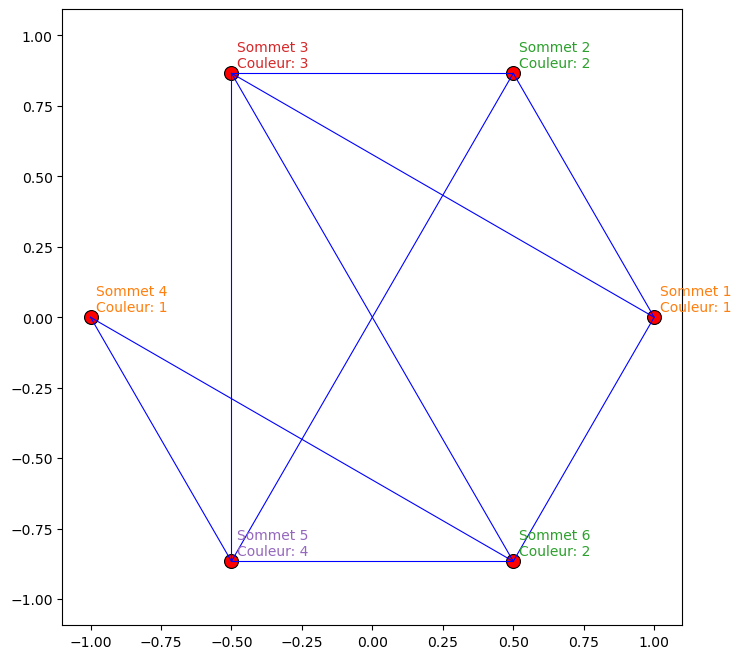

In [77]:
import numpy as np
import matplotlib.pyplot as plt
from collections import deque

class DynamicGraph:
    def __init__(self): # Ce graphe a des attributs suivants pour stocker les informations sur le graphe:  
        self.vertices = {} # vertices (un dictionnaire) pour stocker les sommets du graphe
        self.edges = set() # edges (un ensemble) pour stocker les arêtes du graphe
        self.colors = {} # colors (un dictionnaire) pour stocker les couleurs attribuées à chaque sommet du graphe
        self.deleted_vertices = [] # et deleted_vertices pour stocker les sommets qui ont été supprimés du graphe

    def add_vertex(self, vertex): # Cette méthode ajoute un sommet 'vertex' au graphe
        if vertex not in self.vertices: # vérifie si le sommet 'vertex' n'est pas déjà dans le graphe
            self.vertices[vertex] = set() # ajoute le sommet 'vertex' au dictionnaire 'vertices'
            self.colors[vertex] = None # initialise la couleur du sommet 'vertex' à None
            
    def add_edge(self, edge): # Cette méthode ajoute une arête au graphe        
        self.edges.add(frozenset(edge)) # ajoute une arête au graphe sous forme d'un frozenset pour garantir l'immutabilité et l'unicité des arêtes
        for vertex in edge: # parcourt chaque sommet dans l'arête ce qui est représentée par une paire non ordonnée de sommets
            self.vertices[vertex].add(frozenset(edge)) # ajoute 'edge' à 'vertices'. Pour ∀ sommet de 'edge', ajoute l'arête auquel ce sommet appartient
   
    def display_colored_graph(self):
        print("\nColored Dynamic Graph:")
        print("Vertices:", self.vertices) # Affiche les sommets du graphe sous forme de dictionnaire des sommets et de leurs ensembles d'arêtes associés

        # Crée un ensemble valid_edges qui contient uniquement les arêtes valides Crée un ensemble qui contient uniquement les arêtes valides 
        # càd que les arêtes dont tous les sommets appartiennent à l'ensemble des sommets du graphe 
        valid_edges = {edge for edge in self.edges if all(v in self.vertices for v in edge)}

        print("Edges:", valid_edges) # Affiche les arêtes valides du graphe en affichant le contenu de l'ensemble valid_edges
        print("Colors:", self.colors) # Affiche les couleurs attribuées à chaque sommet du graphe en affichant le contenu de l'attribut colors

        if all(color is not None for color in self.colors.values()): # Vérifie si toutes les couleurs sont attribuées (aucun sommet n'a 1 couleur None)
            print("Chromatic Number:", len(set(self.colors.values()))) # affiche le nombre chromatique du graphe

    def chromatic_number(self):
        self.color_graph_backtracking() # attribue les couleurs aux sommets du graphe
        return len(set(self.colors.values())) # Calcule et renvoie le nombre chromatique du graphe

    def is_valid_color(self, vertex, color): # Cette méthode vérifie si attribuer une certaine couleur à un sommet est valide
        # Vérifie si le sommet 'vertex' n'est pas dans self.vertices ou s'il a été marqué comme supprimé (vertex in self.deleted_vertices)
        if vertex not in self.vertices or vertex in self.deleted_vertices:
            return False # la couleur n'est pas valide

        for edge in self.vertices[vertex]: # Parcourt chaque arête associée au sommet 'vertex'
            # Trouve le sommet adjacent à 'vertex' dans l'arête en cours
            adjacent_vertex = next(iter(set(edge) - {vertex})) # obtenir le sommet adj à un sommet donné dans 1 arête
            if ( # Vérifie si le sommet adjacent a déjà une couleur attribuée et si cette couleur est la même que celle qu'on veut attribuer à 'vertex'
                adjacent_vertex in self.colors
                and self.colors[adjacent_vertex] == color
                and adjacent_vertex not in self.deleted_vertices # Vérifie également que le sommet adjacent n'a pas été marqué comme supprimé
            ):
                return False # retourne False, indiquant que la couleur n'est pas valide
        # Si aucune des conditions ci-dessus n'est satisfaite, la méthode retourne True, indiquant que la couleur est valide pour le sommet 'vertex'
        return True

    def color_graph_backtracking(self, vertex=1): # Cette méthode met en œuvre l'algorithme de coloration de graphe par rétrogradation (backtracking)
        m = len(self.vertices) # Calcule le nombre total de sommets dans le graphe et l'assigne à la variable m
        if vertex > m: # Vérifie si vertex dépasse le nombre total de sommets, ce qui signifie que tous les sommets ont été colorés
            return True # la fonction retourne True

        for color in range(1, m + 1): # Boucle à travers toutes les couleurs possibles (de 1 à m inclus)
            if self.is_valid_color(vertex, color): # Vérifie si attribuer 'color' à 'vertex' est une coloration valide
                self.colors[vertex] = color # Si la couleur est valide, elle est attribuée au sommet 'vertex'

                if self.color_graph_backtracking(vertex + 1): # passe au sommet suivant (vertex + 1) et si cela retourne True
                    return True # la fonction retourne True (la coloration a réussi pour les sommets suivants)
                # Si la coloration n'est pas réussie, la couleur attribuée à 'vertex' est remise à None pour essayer une autre couleur dans la boucle
                self.colors[vertex] = None

        # Si aucune couleur n'a conduit à une coloration valide pour les sommets suivants, la fonction retourne False. 
        # Cela déclenche le mécanisme de rétrogradation (backtracking) pour essayer une autre couleur pour le sommet précédent dans l'appel récursif
        return False

    def plotGraph(self):
        # Extrait des informations nécessaires du graphe dynamique, y compris les sommets, les arêtes et les couleurs
        vertices = self.vertices
        edges = self.edges
        colors = self.colors

        # Calcule le nombre total de sommets dans le graphe et l'assigne à la variable V
        V = len(vertices)

        # Obtient une paire (index, vertex) pour chaque sommet
        # Calcule les nouvelles positions des sommets en utilisant des coordonnées polaires (en fonction de son index dans l'ensemble des sommets)
        pos = {vertex: (np.cos(2 * np.pi * i / V), np.sin(2 * np.pi * i / V)) for i, vertex in enumerate(vertices)}

        plt.figure(figsize=(8, 8))
        plt.axis('equal')

        # Trace les arêtes du graphe
        for edge in edges:
            v1, v2 = edge
            plt.plot([pos[v1][0], pos[v2][0]], [pos[v1][1], pos[v2][1]], color='blue', linewidth=0.8)

        # Trace les nœuds du graphe. La couleur des nœuds est en rouge
        for vertex, color in colors.items():
            plt.scatter(pos[vertex][0], pos[vertex][1], color='red', edgecolors='black', linewidth=0.8, s=100)

            # Ajoute un texte à côté de chaque sommet indiquant son numéro et sa couleur, "N/A" si le sommet n'a pas encore de couleur attribuée
            plt.text(pos[vertex][0] + 0.02, pos[vertex][1] + 0.02,
                     f"Sommet {vertex}\nCouleur: {color if color is not None else 'N/A'}",
                     fontsize=10, color=f'C{color if color is not None else "N/A"}')

        plt.show()

# Exemple des graphes
dynamic_graph1 = DynamicGraph()

# Ajoute des sommets en utilisant input()
num_vertices = int(input("Enter the number of vertices for graph 1: "))
for i in range(1, num_vertices + 1):
    dynamic_graph1.add_vertex(i)

# Ajoutedes arêtes en utilisant input()
num_edges = int(input("Enter the number of edges for graph 1: "))
for _ in range(num_edges):
    while True:
        try:
            edge_input = input("Enter an edge (format: 'v1 v2'): ")
            edge_vertices = list(map(int, edge_input.split()))
            if all(v in dynamic_graph1.vertices for v in edge_vertices):
                dynamic_graph1.add_edge((edge_vertices[0], edge_vertices[1]))
                break
            else:
                print("Invalid edge vertices. Please enter vertices that exist in the graph.")
        except ValueError:
            print("Invalid input. Please enter vertices as space-separated integers.")

# Colorier le graphe en utilisant backtracking
dynamic_graph1.color_graph_backtracking()
dynamic_graph1.display_colored_graph()
print("Chromatic Number of graph 1:", dynamic_graph1.chromatic_number())

# Visualise le graphe colorié
dynamic_graph1.plotGraph()